### 필수과제 1
- 교차검증에 대한 개념을 정리해서 쥬피터 노트북 또는 워드파일로 자유롭게 본인의 언어로 정리해주세요!
- 필수과제 1은 노션이 권한 부여된 후 2일 안에 업로드 해주세요!

### 교차검증(Cross validation)
- 모델을 학습시키기 위해 데이터셋을 1번(train, test) 나누는 것이 아니라 k번 나누어 모델의 성능을 비교/향상시키는 학습 방식
- validation셋을 이용하여 모델 하이퍼파라미터의 과적합을 피한다.
- k에 들어갈 값은 데이터의 크기, 성질에 따라 결정한다.
- k-fold cross validation이라고도 한다.

### 학습 방법

In [1]:
from IPython.display import Image

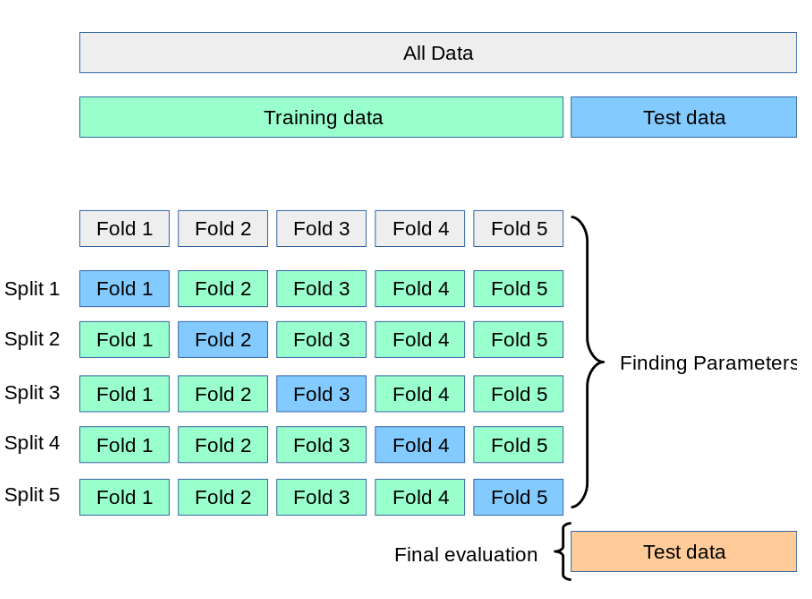

In [21]:
Image("교차검증.png")
# 출처: https://huidea.tistory.com/30

- 먼저 train셋과 test셋을 나눈다. 이때 test셋은 교차검증에 사용하지 않는다.
- train에 사용할 데이터는 k개로 나눈다. k개로 나누어진 데이터셋은 폴드(fold)라고도 불린다.
- 각 폴드를 한 번씩 validation셋으로 이용하고, 나머지 폴드들은 train셋으로 이용하여 k번 학습을 진행한다.
- train셋으로 파라미터를 추정하고, validation셋으로 하이퍼파라미터를 설정한다.
- 최종 평가는 test 데이터로 진행한다.
- k개의 성능 평가 결과의 평균이 해당 학습 모델의 성능이라고 볼 수 있다.

### 장점
- 교차검증을 하면서 하이퍼파라미터를 계속 업데이트하기 때문에 train 데이터의 과적합을 피할 수 있다.
- 이미 학습에 사용한 데이터도 여러번 다시 사용하기 때문에 데이터 수가 부족할 때 유용하다.
- k번에 걸친 성능 평가 결과를 이용하기 때문에 보다 일반화된 모델을 얻을 수 있다.

### 단점
- 데이터를 많이 나누는 만큼 모델 훈련/평가 시간이 오래 걸린다.
- 다른 폴드에 중복 데이터가 동일하게 존재할 경우 모델의 성능이 악화될 수 있다.

### 코드

In [12]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate

In [3]:
# 사이킷런에서 iris 데이터 불러오기
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

In [6]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df["y"] = iris_label

In [7]:
dt_clf = DecisionTreeClassifier(random_state=111)

In [20]:
# k = 3인 교차검증
score = cross_val_score(dt_clf, iris_data, iris_label, scoring="accuracy", cv=3)
print("k = 3 교차검증별 정확도:", np.round(score, 3))
print("k = 3 평균 정확도: {0:.3f}".format(np.mean(score)))

k = 3 교차검증별 정확도: [0.98 0.94 0.98]
k = 3 평균 정확도: 0.967


In [22]:
# k = 5인 교차검증
score = cross_val_score(dt_clf, iris_data, iris_label, scoring="accuracy", cv=5)
print("k = 5 교차검증별 정확도:", np.round(score, 3))
print("k = 5 평균 정확도: {0:.3f}".format(np.mean(score)))

k = 5 교차검증별 정확도: [0.967 0.967 0.9   0.967 1.   ]
k = 5 평균 정확도: 0.960


- iris 데이터를 가지고 k = 3인 교차검증을 한 결과 각 정확도는 0.98, 0.94, 0.98이었으며 평균 정확도는 0.967이 나왔다.
- iris 데이터를 가지고 k = 5인 교차검증을 한 결과 각 정확도는 0.967, 0.967, 0.9, 0.967, 1.0이었으며 평균 정확도는 0.960이 나왔다.